In [1]:
# 시도별 전출입 인구수 데이터 불러오기 pd.read_excel(파일)
# 전출지별에 누락데이터 처리
# 전출지가 '서울특별시'에서 다른 도시로 전입한 인구수만 추출
# 같은 데이터만 보유하고 있는 전출지별 컬럼을 삭제
# 전입지별 컬럼명을 전입지로 변경
# 전입지를 인덱스로 결정
# 전입지가 경기도인 자료만 추출
# 년도별 전입자의 변화를 확인 

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_excel('./dataset/시도별 전출입 인구수.xlsx')
df.head()

,전출지별,전입지별,1970,1971,1972,1973,1974,1975,1976,1977,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,전출지별,전입지별,이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),...,이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명)
1,전국,전국,4046536,4210164,3687938,4860418,5297969,9011440,6773250,7397623,...,8808256,8487275,8226594,8127195,7506691,7411784,7629098,7755286,7378430,7154226
2,NaN,서울특별시,1742813,1671705,1349333,1831858,2050392,3396662,2756510,2893403,...,2025358,1873188,1733015,1721748,1555281,1520090,1573594,1589431,1515602,1472937
3,NaN,부산광역시,448577,389797,362202,482061,680984,805979,724664,785117,...,514502,519310,519334,508043,461042,478451,485710,507031,459015,439073
4,NaN,대구광역시,-,-,-,-,-,-,-,-,...,409938,398626,370817,370563,348642,351873,350213,351424,328228,321182


In [3]:
# 전출지별에 NaN이 있기 때문에 NaN 값을 '전국'으로 채워준다.(rows=1이 전국 값으로 채워져 있어 그걸 가져와서 채운다.)
df = df.fillna(method='ffill')
df.head()

,전출지별,전입지별,1970,1971,1972,1973,1974,1975,1976,1977,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,전출지별,전입지별,이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),...,이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명)
1,전국,전국,4046536,4210164,3687938,4860418,5297969,9011440,6773250,7397623,...,8808256,8487275,8226594,8127195,7506691,7411784,7629098,7755286,7378430,7154226
2,전국,서울특별시,1742813,1671705,1349333,1831858,2050392,3396662,2756510,2893403,...,2025358,1873188,1733015,1721748,1555281,1520090,1573594,1589431,1515602,1472937
3,전국,부산광역시,448577,389797,362202,482061,680984,805979,724664,785117,...,514502,519310,519334,508043,461042,478451,485710,507031,459015,439073
4,전국,대구광역시,-,-,-,-,-,-,-,-,...,409938,398626,370817,370563,348642,351873,350213,351424,328228,321182


In [4]:
mask = ((df['전출지별'] == '서울특별시') & (df['전입지별'] != '서울특별시'))
df_seoul = df[mask]

# 전출지별 칼럼 삭제
df_seoul = df_seoul.drop('전출지별', axis=1)
# # 전입지별 -> 전입지로 변경
df_seoul = df_seoul.rename(columns = {'전입지별':'전입지'})
df_seoul.head()

,전입지,1970,1971,1972,1973,1974,1975,1976,1977,1978,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
19,전국,1448985,1419016,1210559,1647268,1819660,2937093,2495620,2678007,3028911,...,2083352,1925452,1848038,1834806,1658928,1620640,1661425,1726687,1655859,1571423
21,부산광역시,11568,11130,11768,16307,22220,27515,23732,27213,29856,...,17353,17738,17418,18816,16135,16153,17320,17009,15062,14484
22,대구광역시,-,-,-,-,-,-,-,-,-,...,9720,10464,10277,10397,10135,10631,10062,10191,9623,8891
23,인천광역시,-,-,-,-,-,-,-,-,-,...,50493,45392,46082,51641,49640,47424,43212,44915,43745,40485
24,광주광역시,-,-,-,-,-,-,-,-,-,...,10846,11725,11095,10587,10154,9129,9759,9216,8354,7932


In [5]:
# 전입지 컬럼을 인덱스로 설정
df_seoul = df_seoul.set_index('전입지')
print(df_seoul)

            1970     1971     1972     1973     1974     1975     1976  \
전입지                                                                      
전국       1448985  1419016  1210559  1647268  1819660  2937093  2495620   
부산광역시      11568    11130    11768    16307    22220    27515    23732   
대구광역시          -        -        -        -        -        -        -   
인천광역시          -        -        -        -        -        -        -   
광주광역시          -        -        -        -        -        -        -   
대전광역시          -        -        -        -        -        -        -   
울산광역시          -        -        -        -        -        -        -   
세종특별자치시        -        -        -        -        -        -        -   
경기도       130149   150313    93333   143234   149045   253705   202276   
강원도         9352    12885    13561    16481    15479    27837    25927   
충청북도        6700     9457    10853    12617    11786    21073    18029   
충청남도       15954    18943    23406    

1970    130149
1971    150313
1972     93333
1973    143234
1974    149045
1975    253705
1976    202276
1977    207722
1978    237684
1979    278411
1980    297539
1981    252073
1982    320174
1983    400875
1984    352238
1985    390265
1986    412535
1987    405220
1988    415174
1989    412933
1990    473889
1991    384714
1992    428344
1993    502584
1994    542204
1995    599411
1996    520566
1997    495454
1998    407050
1999    471841
2000    435573
2001    499575
2002    516765
2003    457656
2004    400206
2005    414621
2006    449632
2007    431637
2008    412408
2009    398282
2010    410735
2011    373771
2012    354135
2013    340801
2014    332785
2015    359337
2016    370760
2017    342433
Name: 경기도, dtype: object


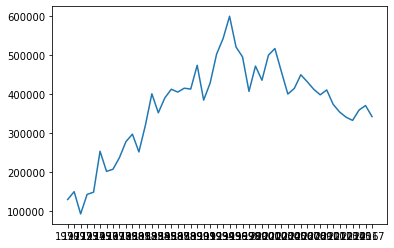

In [6]:
# 경기도로 전입한 인구수의 변화도를 그래프로 표현
df_one = df_seoul.loc['경기도'] # series
print(df_one)

# index = x축, 인구수 = y축
plt.plot(df_one.index, df_one.values) # x축 년도, y축 인구수

In [7]:
import matplotlib.pyplot as plt
from matplotlib import rc
rc('font', family = 'Malgun Gothic') 
plt.rcParams['axes.unicode_minus'] = False

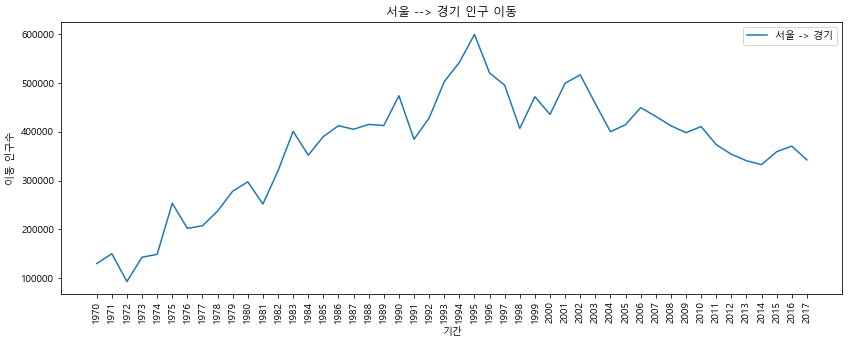

In [8]:
# 아직 완전하지 않는 차트를 꾸민다.
plt.figure(figsize=(14,5))  # 차트 크기 변경 
plt.plot(df_one.index, df_one.values) # x축 년도, y축 인구수
plt.title('서울 --> 경기 인구 이동')
plt.xlabel('기간')
plt.ylabel('이동 인구수')

# 부가 설명
plt.legend(labels=['서울 -> 경기'], loc='best')
plt.xticks(size=10, rotation='vertical')
plt.show()

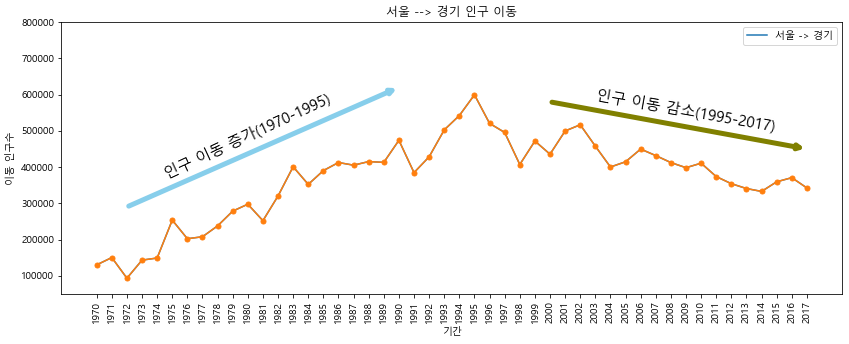

In [9]:
# xticks를 추가하여 설정해본다. 그래프의 차이를 확인한다.
plt.figure(figsize=(14,5))  # 차트 크기 변경 
plt.plot(df_one.index, df_one.values) # x축 년도, y축 인구수

# 그래프 꺽임에 마커 표시
plt.plot(df_one, marker='o', markersize=5)
plt.title('서울 --> 경기 인구 이동')
plt.xlabel('기간')
plt.ylabel('이동 인구수')

# 부가 설명
plt.legend(labels=['서울 -> 경기'], loc='best')

# xticks
plt.xticks(size=10, rotation='vertical')

plt.ylim(50000, 800000)
# 화살표 정의
plt.annotate('', xy=(20, 620000), xytext=( 2, 290000), xycoords='data',
             arrowprops=dict(arrowstyle = '->', color='skyblue', lw=5))
plt.annotate('', xy=(47, 450000), xytext=(30, 580000), xycoords='data',
             arrowprops=dict(arrowstyle = '->', color='olive', lw=5))
# 주석 표시
plt.annotate('인구 이동 증가(1970-1995)', xy=(10, 370000), rotation=25,
            va='baseline', ha='center', fontsize=15)
plt.annotate('인구 이동 감소(1995-2017)', xy=(39, 500000), rotation=-10,
            va='baseline', ha='center', fontsize=15)

plt.show()

# 그래프 설정은 같은 셀에 있어야 한다.(쥬피터 노트북)

C:\Users\ADMINI~1\AppData\Local\Temp/ipykernel_9304/335299180.py:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(df_one.index, rotation=75)
C:\Users\ADMINI~1\AppData\Local\Temp/ipykernel_9304/335299180.py:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(df_one.index, rotation=45)


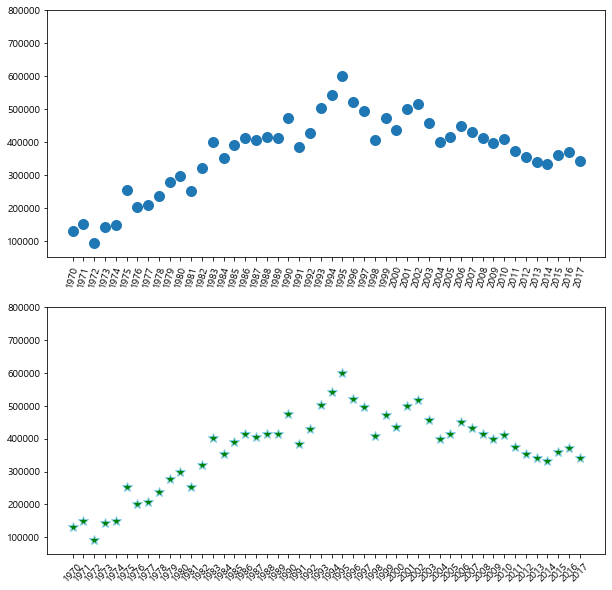

In [10]:
# 한 페이지에 두 개의 그래프를 그림, 두개의 행으로
fig = plt.figure(figsize=(10,10))
# 2
ax1 = fig.add_subplot(2, 1, 1)
ax2 = fig.add_subplot(2, 1, 2)

# axe 각 객체에 대한 plot 정의
ax1.plot(df_one, 'o', markersize = 10)
ax2.plot(df_one, '*', markerfacecolor='green', markersize=10
         , color='skyblue', linewidth=2, label='서울 -> 경기')
# ax2.legend(loc='best')

# y축 범위설정(최소값, 최대값)
ax1.set_ylim(50000, 800000)
ax2.set_ylim(50000, 800000)


# x축 눈금 라벨 지정 75도 회전
ax1.set_xticklabels(df_one.index, rotation=75)
ax2.set_xticklabels(df_one.index, rotation=45)

plt.show()

In [11]:
# 하나의 페이지에 여러 개의 그래프를 그림

# 서울특별시에서 충청남도, 경상북도, 강원도로 이전한 인구수의 분포도
# 연도를 문자로 변경
col_years = list(map(str, range(1970, 2018))) # row 개수
df_two = df_seoul.loc[['충청남도', '경상북도', '강원도'], col_years] 
# df_two.columns
# col_years = list(map(str, range(1970, 2018)))
# col_years

C:\Users\ADMINI~1\AppData\Local\Temp/ipykernel_9304/1769930817.py:25: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(col_years, rotation='vertical')
C:\Users\ADMINI~1\AppData\Local\Temp/ipykernel_9304/1769930817.py:27: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


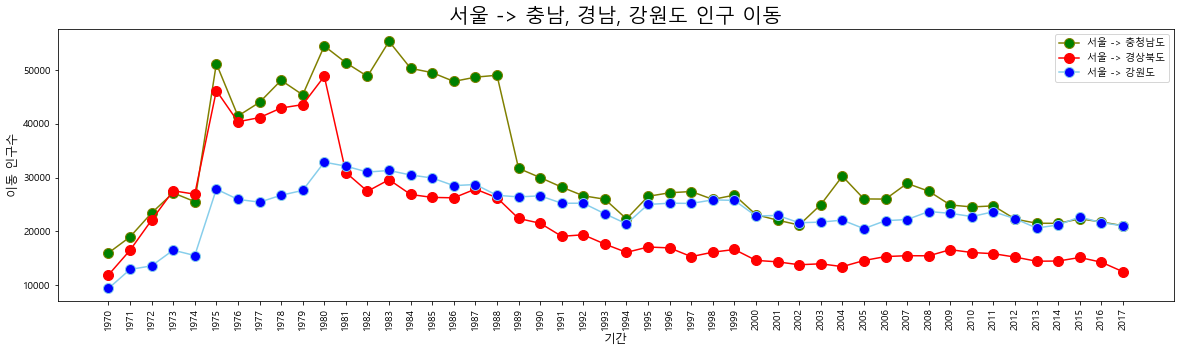

In [12]:

fig = plt.figure(figsize=(20,5))
# add subplot
ax = fig.add_subplot(1, 1, 1)


# axe 각 객체에 대한 plot 정의
ax.plot(col_years, df_two.loc['충청남도'], marker='o', markerfacecolor='green',
                               markersize=10, color='olive', label='서울 -> 충청남도')
ax.plot(col_years, df_two.loc['경상북도'], marker='o', markerfacecolor='red',
                               markersize=10, color='red', label='서울 -> 경상북도')
ax.plot(col_years, df_two.loc['강원도'], marker='o', markerfacecolor='blue',
                               markersize=10, color='skyblue',label='서울 -> 강원도')

ax.legend(loc='best')
#  차트 제목 추가
ax.set_title("서울 -> 충남, 경남, 강원도 인구 이동", size=20)
# 축 이름 추가
ax.set_xlabel('기간', size=12)
ax.set_ylabel('이동 인구수', size=12)

# y축 범위설정(최소값, 최대값)
#ax.set_ylim(50000, 800000)

# x축 눈금 라벨 지정 75도 회전
ax.set_xticklabels(col_years, rotation='vertical')

fig.show()

In [13]:
# 서울특별시에서 전라남도 이전한 인구수의 분포도
# 연도를 문자로 변경
col_years = list(map(str, range(1970, 2018))) # row 개수
df_two.loc['전라남도'] = df_seoul.loc['전라남도', col_years] 
df_two.head()

,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
전입지,,,,,,,,,,,,,,,,,,,,,
충청남도,15954,18943,23406,27139,25509,51205,41447,43993,48091,45388,...,27458,24889,24522,24723,22269,21486,21473,22299,21741,21020
경상북도,11868,16459,22073,27531,26902,46177,40376,41155,42940,43565,...,15425,16569,16042,15818,15191,14420,14456,15113,14236,12464
강원도,9352,12885,13561,16481,15479,27837,25927,25415,26700,27599,...,23668,23331,22736,23624,22332,20601,21173,22659,21590,21016
전라남도,10513,16755,20157,22160,21314,46610,46251,43430,44624,47934,...,16601,17468,16429,15974,14765,14187,14591,14598,13065,12426


C:\Users\ADMINI~1\AppData\Local\Temp/ipykernel_9304/3616784790.py:36: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(col_years, rotation='vertical')
C:\Users\ADMINI~1\AppData\Local\Temp/ipykernel_9304/3616784790.py:37: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(col_years, rotation='vertical')
C:\Users\ADMINI~1\AppData\Local\Temp/ipykernel_9304/3616784790.py:38: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax3.set_xticklabels(col_years, rotation='vertical')
C:\Users\ADMINI~1\AppData\Local\Temp/ipykernel_9304/3616784790.py:39: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax4.set_xticklabels(col_years, rotation='vertical')
C:\Users\ADMINI~1\AppData\Local\Temp/ipykernel_9304/3616784790.py:41: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the f

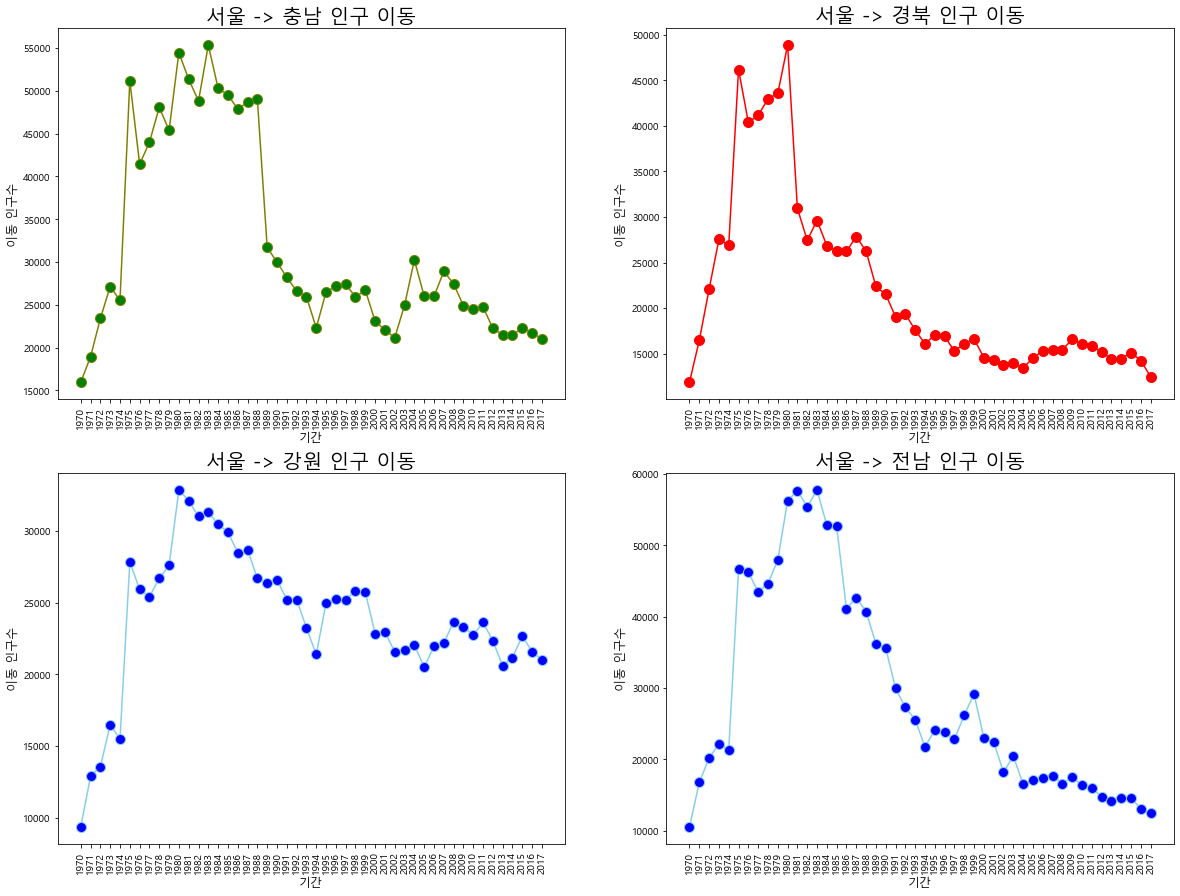

In [14]:

fig = plt.figure(figsize=(20,15))
# add subplot
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
ax4 = fig.add_subplot(2, 2, 4)


# axe 각 객체에 대한 plot 정의
ax1.plot(col_years, df_two.loc['충청남도'], marker='o', markerfacecolor='green',
                               markersize=10, color='olive', label='서울 -> 충청남도')
ax2.plot(col_years, df_two.loc['경상북도'], marker='o', markerfacecolor='red',
                               markersize=10, color='red', label='서울 -> 경상북도')
ax3.plot(col_years, df_two.loc['강원도'], marker='o', markerfacecolor='blue',
                               markersize=10, color='skyblue',label='서울 -> 강원도')
ax4.plot(col_years, df_two.loc['전라남도'], marker='o', markerfacecolor='blue',
                               markersize=10, color='skyblue',label='서울 -> 전라남도')

ax.legend(loc='best')
#  차트 제목 추가
ax1.set_title("서울 -> 충남 인구 이동", size=20)
ax2.set_title("서울 -> 경북 인구 이동", size=20)
ax3.set_title("서울 -> 강원 인구 이동", size=20)
ax4.set_title("서울 -> 전남 인구 이동", size=20)
# 축 이름 추가
ax1.set_xlabel('기간', size=12)
ax1.set_ylabel('이동 인구수', size=12)
ax2.set_xlabel('기간', size=12)
ax2.set_ylabel('이동 인구수', size=12)
ax3.set_xlabel('기간', size=12)
ax3.set_ylabel('이동 인구수', size=12)
ax4.set_xlabel('기간', size=12)
ax4.set_ylabel('이동 인구수', size=12)

# x축 눈금 라벨 지정 75도 회전
ax1.set_xticklabels(col_years, rotation='vertical')
ax2.set_xticklabels(col_years, rotation='vertical')
ax3.set_xticklabels(col_years, rotation='vertical')
ax4.set_xticklabels(col_years, rotation='vertical')

fig.show()

In [15]:
# 면적 그래프
plt.style.use('ggplot')
df_3 = df_two.T #df_two.transpose() 행과 열의 위치를 변경(피봇)
df_3.index = df_3.index.map(int) # str-> int 형으로 변경
df_3.index

Int64Index([1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980,
            1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991,
            1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002,
            2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013,
            2014, 2015, 2016, 2017],
           dtype='int64')

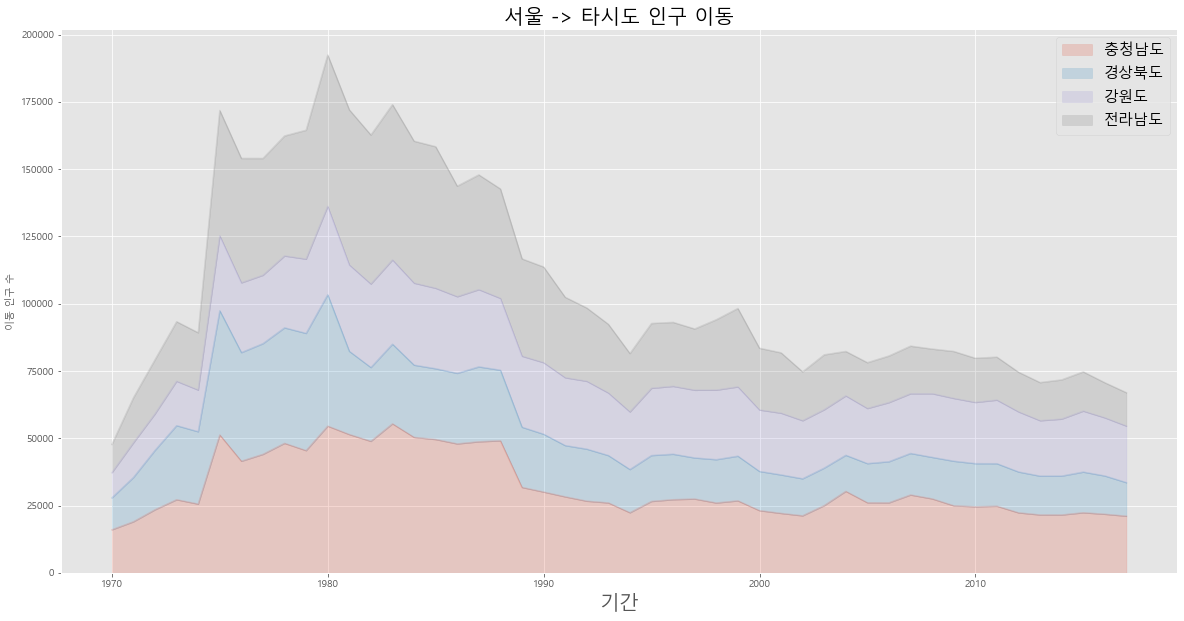

In [16]:
plt.style.use('ggplot')

df_3.plot(kind='area', stacked=True, alpha=0.2, figsize=(20, 10))

plt.title('서울 -> 타시도 인구 이동', size=20)
plt.ylabel('이동 인구 수', size=10)
plt.xlabel('기간', size=20)
plt.legend(fontsize=15)

plt.show()

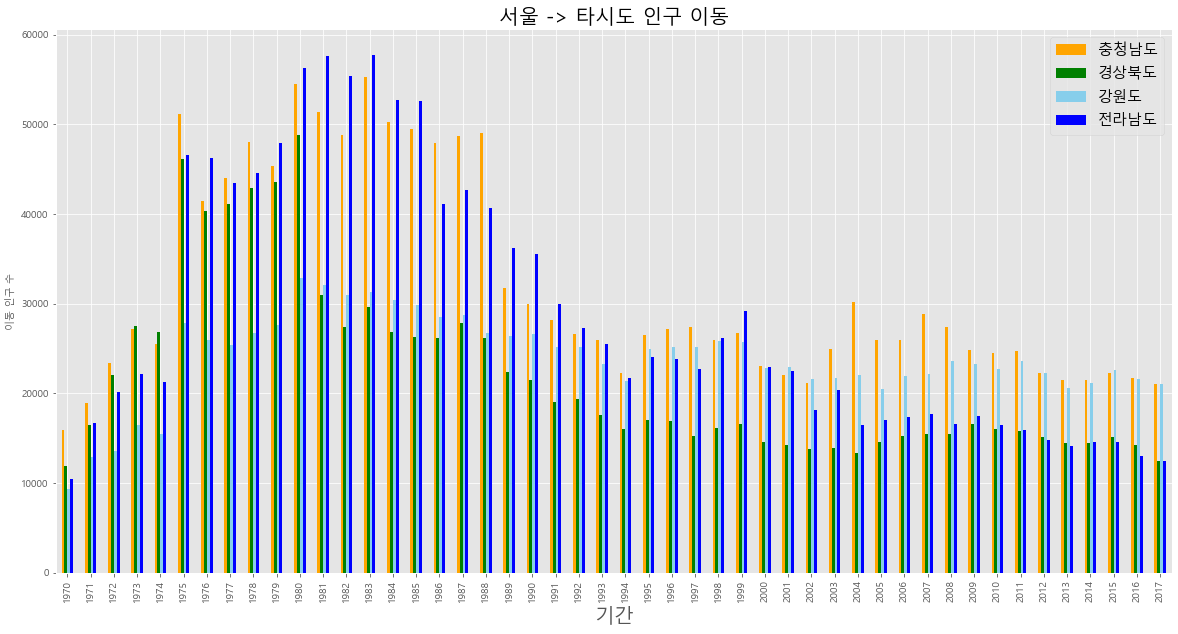

In [17]:
# 막대 그래프
plt.style.use('ggplot')

df_3.plot(kind='bar', color=['orange','green', 'skyblue', 'blue' ], figsize=(20, 10))

plt.title('서울 -> 타시도 인구 이동', size=20)
plt.ylabel('이동 인구 수', size=10)
plt.xlabel('기간', size=20)
plt.legend(fontsize=15)

plt.show()

In [18]:
# 2010년에서 2018년도 까지의 충청남도, 경상남도, 강원도, 전라남도로 이동한 인구 데이터
col_years = list(map(str, range(2010,2018)))
df_4 = df_seoul.loc[['충청남도', '경상남도', '강원도', '전라남도'], col_years]

# 합계 : 이동 인구수의 합계
df_4['합계'] = df_4.sum(axis=1)
df_4

,2010,2011,2012,2013,2014,2015,2016,2017,합계
전입지,,,,,,,,,
충청남도,24522,24723,22269,21486,21473,22299,21741,21020,179533.0
경상남도,15689,16039,14474,14447,14799,15220,13717,12692,117077.0
강원도,22736,23624,22332,20601,21173,22659,21590,21016,175731.0
전라남도,16429,15974,14765,14187,14591,14598,13065,12426,116035.0


In [19]:
# 수평 막대 그래프, 도시별 인구 이동수의 합계를 그래프로 표현
df_total = df_4[['합계']].sort_values(by='합계')
df_total

,합계
전입지,
전라남도,116035.0
경상남도,117077.0
강원도,175731.0
충청남도,179533.0


Text(0.5, 1.0, '서울 -> 타 도시 인구 이동')

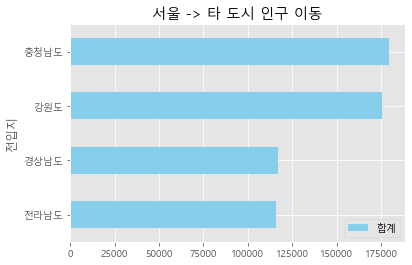

In [20]:
# add subplot
df_total.plot(kind='barh', color='skyblue', width=0.5)
plt.title('서울 -> 타 도시 인구 이동')

In [21]:
# 남북한 발전 전력량 데이터를 가지고 그래프를 생성 twinx()
df = pd.read_excel('./dataset/남북한발전전력량.xlsx')
print(df.head(10))

df_north = df.loc[5:]
print(df_north) # 전력량(억 ~) 컬럼은 제거
df_north  = df_north.drop('전력량 (억㎾h)', axis = 1)
df_north.info

  전력량 (억㎾h) 발전 전력별  1990  1991  1992  1993  1994  1995  1996  1997  ...  2007  \
0        남한     합계  1077  1186  1310  1444  1650  1847  2055  2244  ...  4031   
1       NaN     수력    64    51    49    60    41    55    52    54  ...    50   
2       NaN     화력   484   573   696   803  1022  1122  1264  1420  ...  2551   
3       NaN    원자력   529   563   565   581   587   670   739   771  ...  1429   
4       NaN    신재생     -     -     -     -     -     -     -     -  ...     -   
5        북한     합계   277   263   247   221   231   230   213   193  ...   236   
6       NaN     수력   156   150   142   133   138   142   125   107  ...   133   
7       NaN     화력   121   113   105    88    93    88    88    86  ...   103   
8       NaN    원자력     -     -     -     -     -     -     -     -  ...     -   

   2008  2009  2010  2011  2012  2013  2014  2015  2016  
0  4224  4336  4747  4969  5096  5171  5220  5281  5404  
1    56    56    65    78    77    84    78    58    66  
2  2658  2802  

<bound method DataFrame.info of   발전 전력별 1990 1991 1992 1993 1994 1995 1996 1997 1998  ... 2007 2008 2009  \
5     합계  277  263  247  221  231  230  213  193  170  ...  236  255  235   
6     수력  156  150  142  133  138  142  125  107  102  ...  133  141  125   
7     화력  121  113  105   88   93   88   88   86   68  ...  103  114  110   
8    원자력    -    -    -    -    -    -    -    -    -  ...    -    -    -   

  2010 2011 2012 2013 2014 2015 2016  
5  237  211  215  221  216  190  239  
6  134  132  135  139  130  100  128  
7  103   79   80   82   86   90  111  
8    -    -    -    -    -    -    -  

[4 rows x 28 columns]>

In [22]:
df_north = df_north.set_index('발전 전력별')
df_north

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
발전 전력별,,,,,,,,,,,,,,,,,,,,,
합계,277,263,247,221,231,230,213,193,170,186,...,236,255,235,237,211,215,221,216,190,239
수력,156,150,142,133,138,142,125,107,102,103,...,133,141,125,134,132,135,139,130,100,128
화력,121,113,105,88,93,88,88,86,68,83,...,103,114,110,103,79,80,82,86,90,111
원자력,-,-,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,-


In [23]:
df_north = df_north.T
df_north


발전 전력별,합계,수력,화력,원자력
1990,277,156,121,-
1991,263,150,113,-
1992,247,142,105,-
1993,221,133,88,-
1994,231,138,93,-
1995,230,142,88,-
1996,213,125,88,-
1997,193,107,86,-
1998,170,102,68,-
1999,186,103,83,-


In [24]:
# 증감율 계산, 수력, 화력, 합계 -> 총발전량, 증감율 컬럼 추가
df_north = df_north.rename(columns={'합계':'총발전량'})

In [25]:
# df_north['총발전량'].shift(1) # 한 칸 씩 내려감
df_north['총발전량 - 1년'] = df_north['총발전량'].shift(1)
df_north['증감율'] = ((df_north['총발전량']/df_north['총발전량 - 1년']) - 1) * 100
print(df_north)

발전 전력별 총발전량   수력   화력 원자력 총발전량 - 1년        증감율
1990    277  156  121   -       NaN        NaN
1991    263  150  113   -       277  -5.054152
1992    247  142  105   -       263   -6.08365
1993    221  133   88   -       247 -10.526316
1994    231  138   93   -       221   4.524887
1995    230  142   88   -       231    -0.4329
1996    213  125   88   -       230  -7.391304
1997    193  107   86   -       213  -9.389671
1998    170  102   68   -       193 -11.917098
1999    186  103   83   -       170   9.411765
2000    194  102   92   -       186   4.301075
2001    202  106   96   -       194   4.123711
2002    190  106   84   -       202  -5.940594
2003    196  117   79   -       190   3.157895
2004    206  125   81   -       196   5.102041
2005    215  131   84   -       206   4.368932
2006    225  126   99   -       215   4.651163
2007    236  133  103   -       225   4.888889
2008    255  141  114   -       236   8.050847
2009    235  125  110   -       255  -7.843137
2010    237  

<AxesSubplot:>

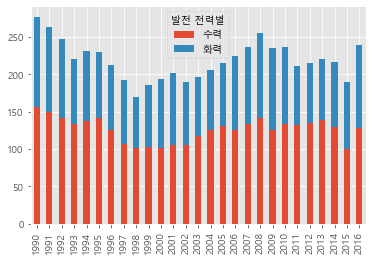

In [26]:
df_north[['수력', '화력']].plot(kind='bar', stacked=True)

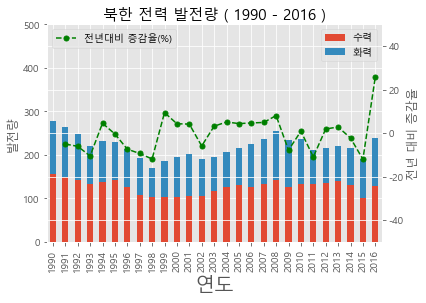

In [27]:
# 2축을 가진 그래프 그리기
ax1 = fig.add_subplot(1, 1, 1)
ax1 = df_north[['수력', '화력']].plot(kind='bar', stacked=True)
ax2 = ax1.twinx()
ax2.plot(df_north.index, df_north['증감율'], ls = '--', marker='o', markersize=5,
         color='green', label='전년대비 증감율(%)')

ax1.set_ylim(0,500)
ax2.set_ylim(-50, 50)

ax1.set_xlabel('연도', size=20)
ax1.set_ylabel('발전량')

ax2.set_ylabel('전년 대비 증감율')

plt.title("북한 전력 발전량 ( 1990 - 2016 )", size=15)
ax2.legend(loc='upper left') # 수력, 화력
ax1.legend(loc='best') # 전년 대비 증감율
plt.show()

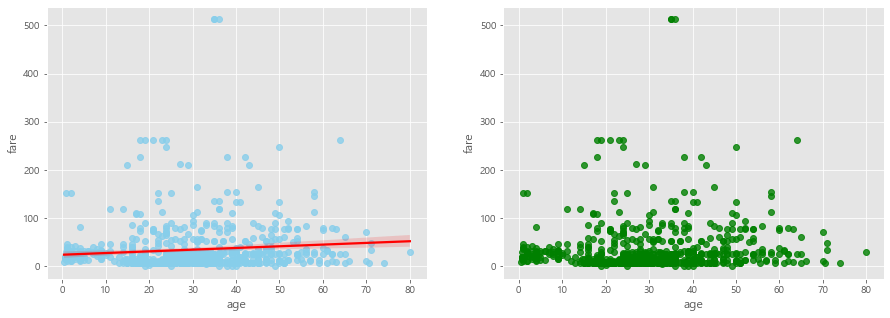

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

titanic = sns.load_dataset('titanic')

# age, fare 컬럼간의 관계 -> 회귀선
fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(1, 2, 1) # 회귀선을 그리기
ax2 = fig.add_subplot(1, 2, 2) # 회귀선 보이지 않기

# 그래프 그리기 - 선형회귀선 표시(fig_reg = True)
sns.regplot(x= 'age', y='fare', data=titanic, ax=ax1, color='skyblue', line_kws={'color': 'red'})
# 그래프 그리기 - 선형회귀선 표시 없음 (fig_reg = False)
sns.regplot(x= 'age', y='fare', data=titanic, ax=ax2, fit_reg=False, color='green')

plt.show()


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


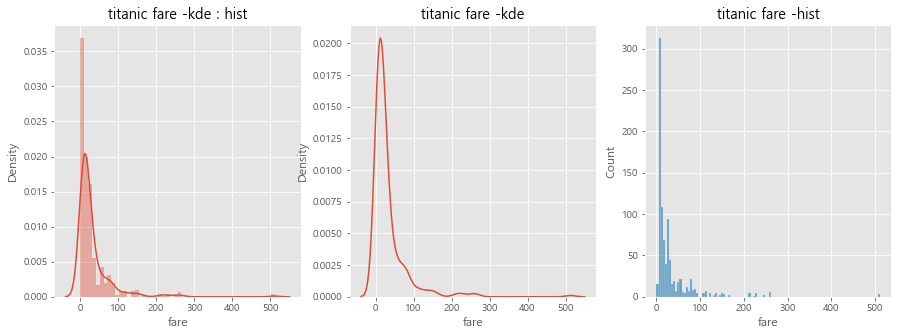

In [29]:
# 커널 밀도 함수 : data가 집중된 분포, hist, kde
fig = plt.figure(figsize=(15,5)) # (10, 10)
ax1 = fig.add_subplot(1, 3, 1)
ax2 = fig.add_subplot(1, 3, 2)
ax3 = fig.add_subplot(1, 3, 3)

# 기본 값 : hist = True, kde = True
sns.distplot(titanic['fare'], ax=ax1)

# kde = True, hist = Fasle
sns.kdeplot(titanic['fare'], ax=ax2)

# kde = False, hist = True
sns.histplot(titanic['fare'], ax=ax3)


ax1.set_title('titanic fare -kde : hist')
ax2.set_title('titanic fare -kde')
ax3.set_title('titanic fare -hist')
plt.show()

<AxesSubplot:xlabel='class', ylabel='sex'>

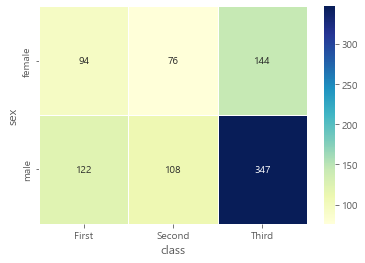

In [30]:
# heatmap : 색깔로 두 변수의 관계성을 보여주는 그래프
table = titanic.pivot_table(index=['sex'], columns=['class'], aggfunc='size')
sns.heatmap(table, annot=True, fmt='d', # format = decimal
           cmap='YlGnBu',
           linewidth=.5,
           cbar = True)

In [31]:
table

class,First,Second,Third
sex,,,
female,94,76,144
male,122,108,347


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 8.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


Text(0.5, 1.0, 'Swarm Plot')

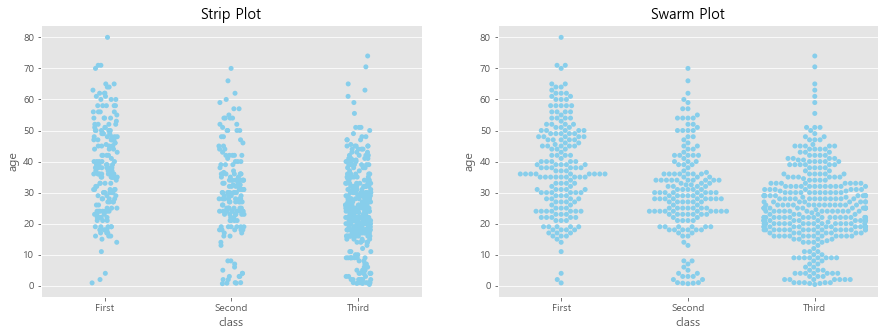

In [32]:
# df.plot(x, y) # x의 개수와 y의 개수는 동일
# 범주형 데이터의 산점도 (타이타닉의 1,2,3등석의 산점도)
titanic['class'].dtype

fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

# 이산형 변수의 분포 : 데이터 분산 고려하지 않음
sns.stripplot(x= 'class', y='age', data=titanic, ax=ax1, color='skyblue')

# 이산형 변수의 분포 : 데이터 분산 고려
sns.swarmplot(x= 'class', y='age', data=titanic, ax=ax2, color='skyblue')

ax1.set_title('Strip Plot')
ax2.set_title('Swarm Plot')

In [33]:
# shell 명령어를 쥬피터 노트북에서 실행할 수 있다.
!pip install folium

In [34]:
# 지도를 활용 : Folium 라이브러리
import folium

In [35]:
# 서울의 지도 만들기
seoul_map = folium.Map(location=[37.55, 126.98], zoom_start=12)

# 맵을 파일로 저장
seoul_map.save('./dataset/seoul.html')



In [36]:
# 지도 스타일 적용하기
seoul_map2 = folium.Map(location=[37.55, 126.98], zoom_start=12, tiles= 'Stamen Terrain')
seoul_map3 = folium.Map(location=[37.55, 126.98], zoom_start=12, tiles= 'Stamen Toner')

seoul_map2.save('./dataset/seoul2.html')
seoul_map3.save('./dataset/seoul3.html')

In [37]:
# 지도에 마커 표시하기
# 위도 경도의 자료가 있는 데이터를 load
df = pd.read_excel('./dataset/서울지역 대학교 위치.xlsx', index_col = 0)
df.head()


,위도,경도
KAIST 서울캠퍼스,37.592573,127.046737
KC대학교,37.548345,126.854797
가톨릭대학교(성신교정),37.585922,127.004328
가톨릭대학교(성의교정),37.499623,127.006065
감리교신학대학교,37.567645,126.961610


In [38]:
seoul_map = folium.Map(location=[37.55, 126.98], zoom_start=12, tiles= 'Stamen Terrain')

for name, lat, lng in zip(df.index, df.위도, df.경도):
    # print(name, lat, lng)
    folium.Marker([lat, lng], popup=name).add_to(seoul_map)
seoul_map.save('./dataset/seoul_colleges.html')

In [39]:
# 방법 2.

df = pd.read_excel('./dataset/서울지역 대학교 위치.xlsx')
df = df.rename(columns = { 'Unnamed: 0' : 'name'})
print(df.head())

for name, lat, lng in zip(df.name, df.위도, df.경도):
    folium.Marker( [lat, lng] , popup=name ).add_to(seoul_map)
seoul_map.save('./dataset/seoul_c1.html')

           name         위도          경도
0  KAIST 서울캠퍼스   37.592573  127.046737
1         KC대학교  37.548345  126.854797
2  가톨릭대학교(성신교정)  37.585922  127.004328
3  가톨릭대학교(성의교정)  37.499623  127.006065
4      감리교신학대학교  37.567645  126.961610
